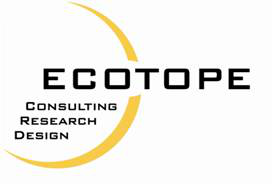

In [1]:
from IPython.display import Image
#Image(filename='ecotope_color_logo.png') 
Image(filename = "ecotope_color_logo.png", width=251.8, height=55.5)

In [2]:
import pandas as pd
import numpy as np

import math
import sqlite3
import os

In [3]:
# define path for database file
path = "C:\\Users\\scott\\github\\OCCE_HVAC_Comparison\\"
filename = "NEAA_final_dataset.db"

# make connection
con = sqlite3.connect(os.path.join(path, filename))

In [4]:
# Inputs
t_oa = 14 # outdoor air temperature at Heating Design Setpoint
t_stpt = 72 # room setpoint temperatures

In [5]:
# text for OA sql query
sql_query = "SELECT siteid, [cfm/sf], totalmeasurement, conditionedmeasurement FROM SPACES " #
SPACES = pd.read_sql_query(sql_query, con)

SPACES = SPACES.replace(r'^\s*$', np.nan, regex=True) #replace blank spaces with NaN

In [6]:
# estimate outdoor air
SPACES['OutdoorAir [cfm]'] = (SPACES['cfm/sf'] * SPACES['totalmeasurement'])
SPACES = SPACES.groupby('siteid').sum()

In [7]:
# calculate heating load from OA
SPACES['Q_OA [kBtu]'] = (1.08 * SPACES['OutdoorAir [cfm]'] * (t_stpt - t_oa)) / 1000

In [8]:
SPACES

,cfm/sf,totalmeasurement,conditionedmeasurement,OutdoorAir [cfm],Q_OA [kBtu]
siteid,,,,,
100016,0.64,172055.180000,123604.00,13663.5200,855.882893
100201,0.93,43059.000000,43059.00,3390.5700,212.385305
101127,1.36,53564.000000,49553.00,6162.1000,385.993944
101959,0.82,63555.000000,63555.00,6597.7000,413.279928
102217,0.23,502651.000000,108792.00,25022.1600,1567.388102
102938,4.94,140535.000000,52641.00,15249.8200,955.248725
103148,1.24,9385.000000,9298.00,3538.8800,221.675443
103453,2.11,191040.000000,158029.00,71630.4900,4486.933894
104111,1.25,109789.000000,12448.00,2738.5000,171.539640
